In [1]:
import h5py
import numpy
import time
from matplotlib import pyplot as plt
from affogato.affinities import compute_affinities

Min size: 1
Max size: 627623509


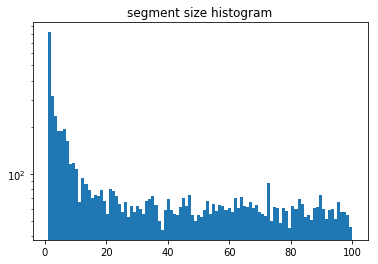

In [2]:
input_h5_file = "/home/adrian/workspace/ilastik-datasets/MuviSPIM/bigcat_singleTimepoint/t00014_s00_uint8.h5"

with h5py.File(input_h5_file, "r+") as input_h5:
    label_ids = input_h5["/volumes/labels/merged_ids"]
    label_ids_copy = numpy.copy(label_ids)
    unique_ids, counts = numpy.unique(label_ids_copy, return_counts=True)
    
    print(f"Min size: {numpy.min(counts)}")
    print(f"Max size: {numpy.max(counts)}")
    
    plt.hist(counts, bins=100, log=True, range=(1, 100))
    plt.title("segment size histogram") 
    plt.show()

In [4]:
input_h5_file = "/home/adrian/workspace/ilastik-datasets/MuviSPIM/bigcat_singleTimepoint/t00014_s00_uint8_filtered_20.h5"
output_h5_file = "/home/adrian/workspace/ilastik-datasets/MuviSPIM/bigcat_singleTimepoint/t00014_s00_uint8_filtered_20_affs.h5"

with h5py.File(input_h5_file, "r+") as input_h5:
    label_ids = input_h5["/volumes/labels/merged_ids"][...]
    # ignore_value=, ignore_value_id=
    affs, mask = compute_affinities(label_ids,
                                    offset=[[-1, 0, 0], 
                                            [0, -1, 0],
                                            [0, 0, -1],
                                            [-10, 0, 0],
                                            [0, -10, 0],
                                            [0, 0, -10]],
                                    have_ignore_label=True,
                                    ignore_label=0)

    print(affs.shape, mask.shape)

    with h5py.File(output_h5_file, "w") as output_h5:
        output_h5.create_dataset("affinities", data=affs)
        output_h5.create_dataset("mask", data=mask)
    

RuntimeError: NumPy: unable to create ndarray

In [1]:
from scipy.ndimage import label, generate_binary_structure

In [7]:
s = generate_binary_structure(3,2)
s

array([[[False,  True, False],
        [ True,  True,  True],
        [False,  True, False]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False,  True, False],
        [ True,  True,  True],
        [False,  True, False]]])